# PRODIGY INFOTECH 
## DATA SCIENCE INTERNSHIP

AGNES ANTONY

##  TASK 1
Create a bar chart or histogram to visualize the distribution of a categorical or continuous variable, such as the distribution of ages or genders in a population.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder

In [3]:
data= pd.read_csv("task1_data.csv")
data=pd.DataFrame(data)
data.head()

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,Female,80.0,0,1,never,25.19,6.6,140,0
1,Female,54.0,0,0,No Info,27.32,6.6,80,0
2,Male,28.0,0,0,never,27.32,5.7,158,0
3,Female,36.0,0,0,current,23.45,5.0,155,0
4,Male,76.0,1,1,current,20.14,4.8,155,0


In [4]:
data.isnull().sum()

gender                 0
age                    0
hypertension           0
heart_disease          0
smoking_history        0
bmi                    0
HbA1c_level            0
blood_glucose_level    0
diabetes               0
dtype: int64

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 9 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   gender               100000 non-null  object 
 1   age                  100000 non-null  float64
 2   hypertension         100000 non-null  int64  
 3   heart_disease        100000 non-null  int64  
 4   smoking_history      100000 non-null  object 
 5   bmi                  100000 non-null  float64
 6   HbA1c_level          100000 non-null  float64
 7   blood_glucose_level  100000 non-null  int64  
 8   diabetes             100000 non-null  int64  
dtypes: float64(3), int64(4), object(2)
memory usage: 6.9+ MB


In [6]:
data.describe()

,age,hypertension,heart_disease,bmi,HbA1c_level,blood_glucose_level,diabetes
count,100000.000000,100000.00000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000
mean,41.885856,0.07485,0.039420,27.320767,5.527507,138.058060,0.085000
std,22.516840,0.26315,0.194593,6.636783,1.070672,40.708136,0.278883
min,0.080000,0.00000,0.000000,10.010000,3.500000,80.000000,0.000000
25%,24.000000,0.00000,0.000000,23.630000,4.800000,100.000000,0.000000
50%,43.000000,0.00000,0.000000,27.320000,5.800000,140.000000,0.000000
75%,60.000000,0.00000,0.000000,29.580000,6.200000,159.000000,0.000000
max,80.000000,1.00000,1.000000,95.690000,9.000000,300.000000,1.000000


In [7]:
data.shape

(100000, 9)

In [8]:
data['age'] = data['age'].round().astype(int)

In [9]:
bins = [0, 10, 20, 30, 40, 50, 60, 70, 80, 90]

labels = ['0-10', '11-20', '21-30', '31-40', '41-50', '51-60', '61-70', '71-80', '81-90']

data['age_group'] = pd.cut(data['age'], bins=bins, labels=labels, right=False,ordered=True)
data.head()

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes,age_group
0,Female,80,0,1,never,25.19,6.6,140,0,81-90
1,Female,54,0,0,No Info,27.32,6.6,80,0,51-60
2,Male,28,0,0,never,27.32,5.7,158,0,21-30
3,Female,36,0,0,current,23.45,5.0,155,0,31-40
4,Male,76,1,1,current,20.14,4.8,155,0,71-80


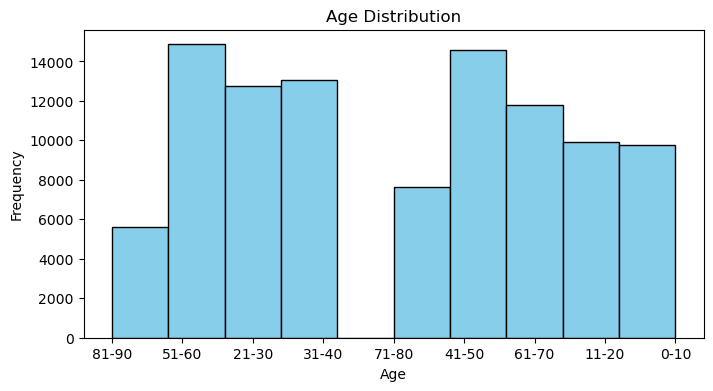

In [15]:
plt.figure(figsize=(8, 4))
plt.hist(data['age_group'], bins=10, color='skyblue', edgecolor='black')

# Adding labels and title
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.title('Age Distribution')

# Show plot
plt.show()

In [11]:
# Initialize LabelEncoder
label_encoder = LabelEncoder()

# Fit and transform 'gender' column
data['gender_encoded'] = label_encoder.fit_transform(data['gender'])
data.head()

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes,age_group,gender_encoded
0,Female,80,0,1,never,25.19,6.6,140,0,81-90,0
1,Female,54,0,0,No Info,27.32,6.6,80,0,51-60,0
2,Male,28,0,0,never,27.32,5.7,158,0,21-30,1
3,Female,36,0,0,current,23.45,5.0,155,0,31-40,0
4,Male,76,1,1,current,20.14,4.8,155,0,71-80,1


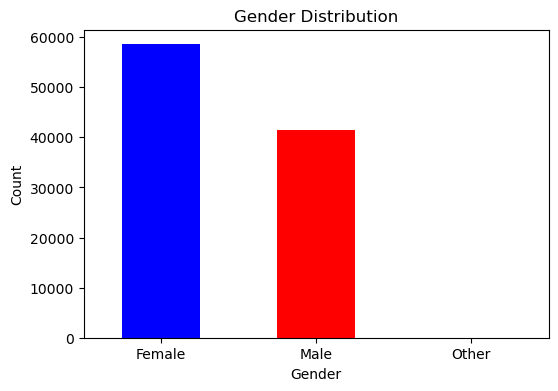

In [12]:
gender_counts = data['gender'].value_counts()
plt.figure(figsize=(6, 4))
gender_counts.plot(kind='bar', color=['blue', 'red', 'green'])  # Assign colors (optional)
plt.xlabel('Gender')
plt.ylabel('Count')
plt.title('Gender Distribution')
plt.xticks(rotation=0)  # Rotate x-axis labels for better readability (optional)
plt.show()


<Figure size 1000x600 with 0 Axes>

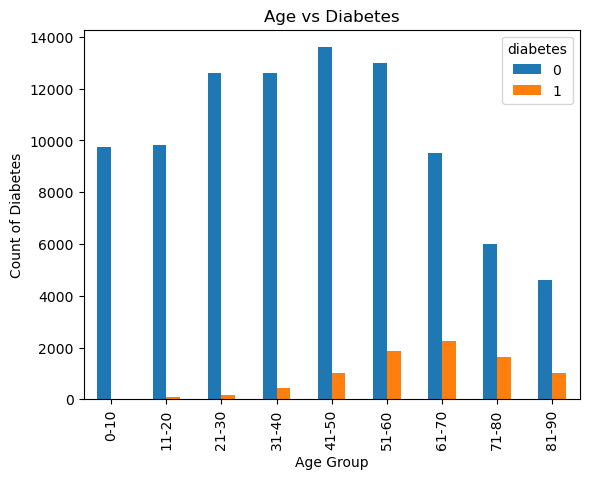

In [13]:
age_diabetes = data.groupby(['age_group', 'diabetes']).size().unstack()

# Plotting
plt.figure(figsize=(10, 6))
age_diabetes.plot(kind='bar')

# Adding labels and title
plt.xlabel('Age Group')
plt.ylabel('Count of Diabetes')
plt.title('Age vs Diabetes')

# Show plot
plt.show()

<Figure size 800x600 with 0 Axes>

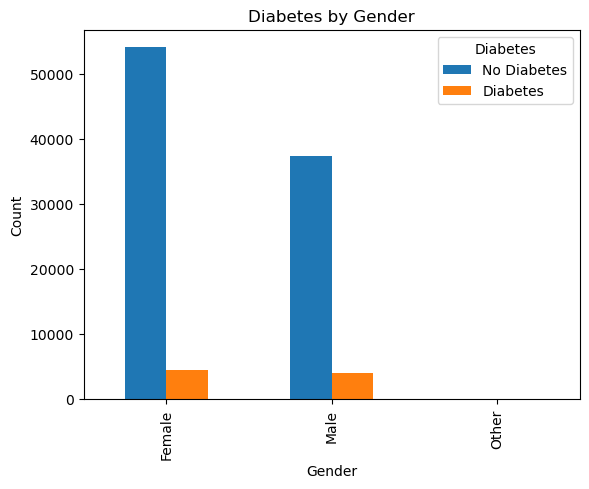

In [14]:
# Grouping by 'gender' and calculating the count of diabetes within each gender
gender_diabetes_count = data.groupby('gender')['diabetes'].value_counts().unstack()

# Plotting
plt.figure(figsize=(8, 6))
gender_diabetes_count.plot(kind='bar')
# Adding labels and title
plt.xlabel('Gender')
plt.ylabel('Count')
plt.title('Diabetes by Gender')
plt.legend(title='Diabetes', labels=['No Diabetes', 'Diabetes'], loc='upper right')

# Show plot
plt.show()